In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00


In [4]:
from qiskit.circuit import QuantumCircuit

import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('light_background') # optional

In [22]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 101.7 MB/s eta 0:00:00


In [23]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile


In [7]:
params = list(np.random.uniform(0, np.pi, size=400))  # 20 qubits
print(params)

[np.float64(0.857549354008845), np.float64(0.2684595278612876), np.float64(0.02004977442028138), np.float64(2.879451251241607), np.float64(2.702999105168457), np.float64(1.143751967950566), np.float64(0.3935295643241272), np.float64(2.7389370222303318), np.float64(0.6020160584151976), np.float64(0.3898973221663926), np.float64(1.4720432715658172), np.float64(2.8697664484477095), np.float64(0.957089735160408), np.float64(3.12353944939176), np.float64(2.28883715355067), np.float64(1.3798986289560662), np.float64(0.036522309452147045), np.float64(1.1106776109565522), np.float64(0.5714426263377373), np.float64(3.0004333515528736), np.float64(1.2769824695614158), np.float64(1.398559811282057), np.float64(1.7380861018675338), np.float64(1.3468456895208405), np.float64(1.0760354544625732), np.float64(1.70695357376204), np.float64(1.5893287899329234), np.float64(0.782202099267015), np.float64(0.06521963438370933), np.float64(3.077550942215088), np.float64(2.5410244455778566), np.float64(0.2681

In [8]:
print(big_statevectors)

[]


In [9]:
phenotypes = ["LOW", "LOW", "HIGH", "LOW", "LOW", "HIGH", "HIGH", "LOW", "HIGH", "LOW", "LOW", "LOW", "HIGH", 'HIGH', 'LOW', "HIGH", 'HIGH', 'LOW'
, 'HIGH', 'LOW' ]
print(phenotypes)

['LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW']


In [10]:
def build_circuit(params1_vals, params2_vals, grid):
  dim = 4
  num_qubits = 4
  # create a 20x20 nested list for the snp genotypes
  qc = QuantumCircuit(dim)

  for i in range(dim):
    for j in range(dim):
      theta = get_theta(grid[i][j])
      if j == 0:
        qc.h(i)
      if grid[i][j] == -1:
        qc.id(i)
      elif j % 2 == 0:
        qc.rx(theta, i)
      elif j % 2 == 1:
        qc.rz(theta, i)

  for qubit in range(num_qubits):
      qc.ry(params1_vals[qubit], qubit)

  qc.cx(3, 0)

  for qubit in range(num_qubits - 1):
      qc.cx(qubit, qubit + 1)

  for qubit in range(num_qubits):
      qc.ry(params2_vals[qubit], qubit)

  for qubit in reversed(range(num_qubits)):
      qc.cx(qubit - 1, qubit)
  qc.measure_all()
  return qc

In [11]:
def get_theta(n):
  return (n+1) * np.pi/3

In [12]:
params = list(np.random.uniform(0, np.pi, size=400))  # 20 qubits
print(params)

[np.float64(2.8428035223094263), np.float64(2.0762660817169296), np.float64(1.5792674527774093), np.float64(1.7538976877870074), np.float64(0.04262944666177094), np.float64(2.9132619364937486), np.float64(1.3426267021235494), np.float64(0.01602468632116757), np.float64(0.22182508383101487), np.float64(1.970728756347964), np.float64(2.4442757592369238), np.float64(0.4141396879605486), np.float64(0.5174580768453952), np.float64(2.2879827336226928), np.float64(1.6162939244320733), np.float64(1.8200362851809795), np.float64(1.2887901638634585), np.float64(2.7511857464694427), np.float64(1.5034094073465543), np.float64(2.570966093204364), np.float64(2.279590404212422), np.float64(1.5254115293573784), np.float64(1.4367276466454024), np.float64(0.1494227892832988), np.float64(1.2330966336975497), np.float64(0.9377666900655737), np.float64(0.5685842860571347), np.float64(1.5273494149340958), np.float64(2.0287984254775977), np.float64(2.9837916403082287), np.float64(2.443296515389434), np.float

In [15]:
from scipy.optimize import minimize

In [16]:
from qiskit.quantum_info import Statevector


In [17]:
statevectors_list = []

In [18]:
# Use the statevector simulator backend for this demonstration.
def cost_function(x):
    num_qubits = 4
    """
    Cost function for the variational algorithm.
    x is a vector of length 40 (first 20 for params1, next 20 for params2).

    For demonstration, we simulate the circuit and compute the distance
    between the resulting statevector and a target state.
    (In your application, you would design a cost function that
     encourages the circuit to output feature vectors that improve your ML task.)
    """

    # Split parameters: first half for first RY layer, second half for second RY layer.
    params1_vals = x[:num_qubits]
    params2_vals = x[num_qubits:]

    # Build the circuit with these parameter values.
    circuit = build_circuit(params1_vals, params2_vals, grid)

    # Execute the circuit to obtain the statevector.
    #job = execute(circuit, backend)

    qc_aer = transpile(circuit, backend=AerSimulator())
    simulator_aer = AerSimulator()
    results = simulator_aer.run(qc_aer, shots=1024).result()
    counts=results.get_counts()
    #statevector = results.get_statevector(circuit)
    circuit.remove_final_measurements()
    statevector = Statevector(circuit)
    statevectors_list.append(statevector)
    #print(statevector)

    # Dummy target: we choose the all-|0> state (i.e. statevector with 1 in the first entry).
    # In practice, replace this with an objective that measures how "good" your feature vectors are.
    target = np.zeros(2**num_qubits, dtype=complex)
    target[0] = 1.0
    # Compute the L2 norm (Euclidean distance) between the statevector and the target.
    cost = np.linalg.norm(statevector - target)
    return cost



In [24]:
num_qubits = 4
big_statevectors = []
#for row in big_list:
  # Given list of 372 elements (example values from 1 to 372)
big_list = [
    [2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2],
    [0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0],
    [0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1],
    [2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
    [2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0],
    [2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2],
    [0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1],
    [0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1],
    [2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2],
    [2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0],
    [2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1],
    [2, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2],
    [0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0],
    [2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0],
    [2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2],
    [0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1],
    [2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0],
    [2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2],
    [0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0]
]

for elements in big_list:
# Initialize a 20x20 matrix filled with -1
  matrix = np.full((4, 4), -1)

  # Fill the matrix with the given elements
  matrix.flat[:len(elements)] = elements

  # Convert to a list of lists
  grid = matrix.tolist()

  # Print the matrix (optional)
  for row in grid:
      print(row)

  # Initial guess: random parameters between 0 and pi.
  x0 = np.random.uniform(0, np.pi, size=2 * num_qubits)

  # Use a classical optimizer (COBYLA in this example) to minimize the cost function.
  result = minimize(cost_function, x0, method='COBYLA')

  print("Optimized parameters:")
  print(result.x)
  print("Final cost:", result.fun)
  print('Last Statevector:')
  print(statevectors_list[len(statevectors_list)-2])
  big_statevectors.append(statevectors_list[len(statevectors_list)-2])
  statevectors_list = []

  # ----- Extract Optimized Feature Vectors -----
  # With the optimized parameters, rebuild and simulate the circuit.
  opt_params1 = result.x[:num_qubits]
  opt_params2 = result.x[num_qubits:]
  opt_circuit = build_circuit(opt_params1, opt_params2, grid)

  # Here you can choose how to extract your feature vectors.
  # For instance, you might measure expectation values of certain observables
  # or simply use the statevector amplitudes (or a function of them) as features.
  qc_aer = transpile(opt_circuit, backend=AerSimulator())
  simulator_aer = AerSimulator()
  results = simulator_aer.run(qc_aer, shots=1024).result()
  counts=results.get_counts()
  final_state = qc_aer.remove_final_measurements()
  statevector = Statevector(qc_aer)
  print("Final statevector (can be processed to yield feature vectors):")
  print(final_state)



[2, 2, 2, 1]
[2, 2, 0, 0]
[0, 0, 0, 2]
[-1, -1, -1, -1]
Optimized parameters:
[ 3.92382400e+00  6.78748374e-01 -2.67824735e+00  1.57077447e+00
  2.24584010e+00  3.29601041e+00 -1.65928822e-05  3.14163150e+00]
Final cost: 0.8146746021300489
Last Statevector:
Statevector([ 6.68152645e-01+1.74187042e-01j,
             -8.03299253e-03+6.06534247e-01j,
             -1.00455898e-02-2.39975158e-01j,
              1.63602644e-06-2.22783360e-01j,
              1.58611025e-03-1.44592851e-01j,
              1.39513377e-01-5.23647871e-02j,
              7.96692380e-06+2.93368112e-02j,
             -5.18661839e-02-3.59828824e-02j,
             -8.81222407e-06+6.54869371e-07j,
             -3.37459145e-06-7.33831489e-06j,
             -1.21166724e-06+8.36610166e-06j,
             -7.10916640e-06-1.93489205e-06j,
             -1.48271612e-06+1.75427682e-05j,
             -1.67773933e-05-4.99435864e-06j,
              2.01970417e-06+5.18081923e-06j,
              1.86181590e-07-4.76380937e-06j],
     

In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Assume you have already imported Qiskit's Statevector class and your statevectors are available.
# from qiskit.quantum_info import Statevector
# For example, your statevectors list might look like:
# statevectors = [Statevector(...), Statevector(...), ...]  # 20 elements

# Your provided phenotype list for each patient:
phenotypes = ['LOW', 'LOW', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW',
              'LOW', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'LOW']

# --- Step 1: Convert statevectors into feature vectors ---
def statevector_to_features(sv):
    """
    Convert a Qiskit statevector into a feature vector by computing
    the squared magnitude (probability) of each amplitude.
    """
    # Assuming sv.data is a numpy array of complex amplitudes
    return np.abs(sv.data)**2

# Suppose your statevectors list is defined as "statevectors".
# Here we create a dummy list for illustration.
# In practice, replace this with your actual statevectors list.
from qiskit.quantum_info import Statevector
# For demonstration, we create 20 random statevectors for a 4-qubit circuit.
num_qubits = 4
statevectors = big_statevectors  # Replace with your actual list

# Convert each statevector to a feature vector (length 16)
features = np.array([statevector_to_features(sv) for sv in statevectors])  # shape: (20, 16)

# --- Step 2: Encode phenotype labels ---
# Convert 'LOW' to 0 and 'HIGH' to 1
labels = np.array([0 if pheno == 'LOW' else 1 for pheno in phenotypes])

# --- Step 3: Split into training (first 14) and test sets (last 6) ---
X_train = features[:14]  # shape: (14, 16)
y_train = labels[:14]    # shape: (14,)
X_test  = features[14:]  # shape: (6, 16)
y_test  = labels[14:]    # shape: (6,)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # shape: (14, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)   # shape: (6, 1)

# --- Step 4: Define the Neural Network ---
class PhenotypeClassifier(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=32, output_dim=1):
        super(PhenotypeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()  # Sigmoid activation for binary classification

    def forward(self, x, return_features=False):
        x1 = self.relu(self.fc1(x))
        x2 = self.fc2(x1)
        out = self.sigmoid(x2)
        if return_features:
            return x1  # return hidden features before output layer
        else:
            return out

model = PhenotypeClassifier()

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary cross entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# --- Training Loop ---
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print("Training complete.")

# --- Evaluate on Test Data ---
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = (test_outputs > 0.5).float()
    accuracy = (predicted.eq(y_test_tensor).sum().item()) / y_test_tensor.shape[0]
    print("\nTest Accuracy:", accuracy)

    # Convert predicted values to phenotype strings
    predicted_labels = ['HIGH' if pred.item() == 1.0 else 'LOW' for pred in predicted]
    print("Predicted phenotypes for the last 6 patients:")
    for i, label in enumerate(predicted_labels, start=15):
        print(f"Patient {i+1}: {label}")



Epoch 10/100, Loss: 0.6604
Epoch 20/100, Loss: 0.6069
Epoch 30/100, Loss: 0.5359
Epoch 40/100, Loss: 0.4659
Epoch 50/100, Loss: 0.4044
Epoch 60/100, Loss: 0.3543
Epoch 70/100, Loss: 0.3149
Epoch 80/100, Loss: 0.2832
Epoch 90/100, Loss: 0.2567
Epoch 100/100, Loss: 0.2339
Training complete.

Test Accuracy: 0.3333333333333333
Predicted phenotypes for the last 6 patients:
Patient 16: HIGH
Patient 17: HIGH
Patient 18: LOW
Patient 19: LOW
Patient 20: LOW
Patient 21: HIGH


In [26]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 846.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [27]:
pip install scikit-learn

In [28]:
from sklearn.decomposition import PCA, FastICA
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

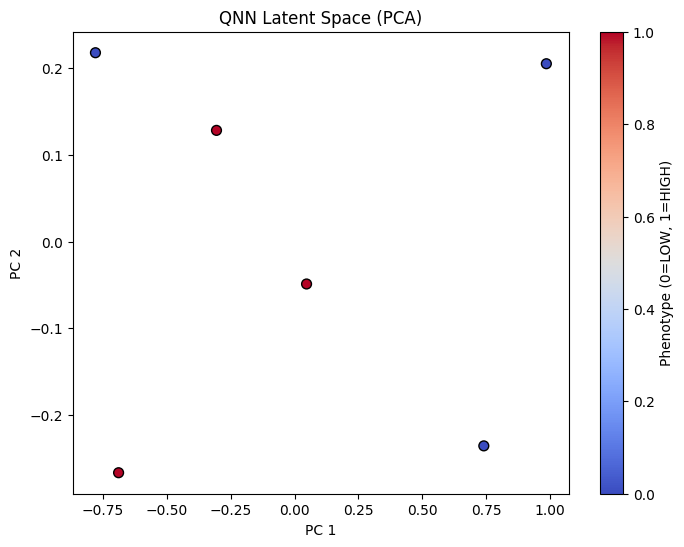

In [30]:
# Extract latent features from the hidden layer using the updated model
with torch.no_grad():
    feats_qnn = model(X_test_tensor, return_features=True).numpy()  # uses the new argument

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_qnn = pca.fit_transform(feats_qnn)

# Plotting the latent space colored by true labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_qnn[:, 0], reduced_qnn[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolor='k')
plt.title("QNN Latent Space (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='Phenotype (0=LOW, 1=HIGH)')
plt.show()


[Classical NN] Epoch 10/100, Loss: 0.6703
[Classical NN] Epoch 20/100, Loss: 0.6377
[Classical NN] Epoch 30/100, Loss: 0.5832
[Classical NN] Epoch 40/100, Loss: 0.5211
[Classical NN] Epoch 50/100, Loss: 0.4612
[Classical NN] Epoch 60/100, Loss: 0.4099
[Classical NN] Epoch 70/100, Loss: 0.3670
[Classical NN] Epoch 80/100, Loss: 0.3325
[Classical NN] Epoch 90/100, Loss: 0.3042
[Classical NN] Epoch 100/100, Loss: 0.2803
[Classical NN] Training complete.


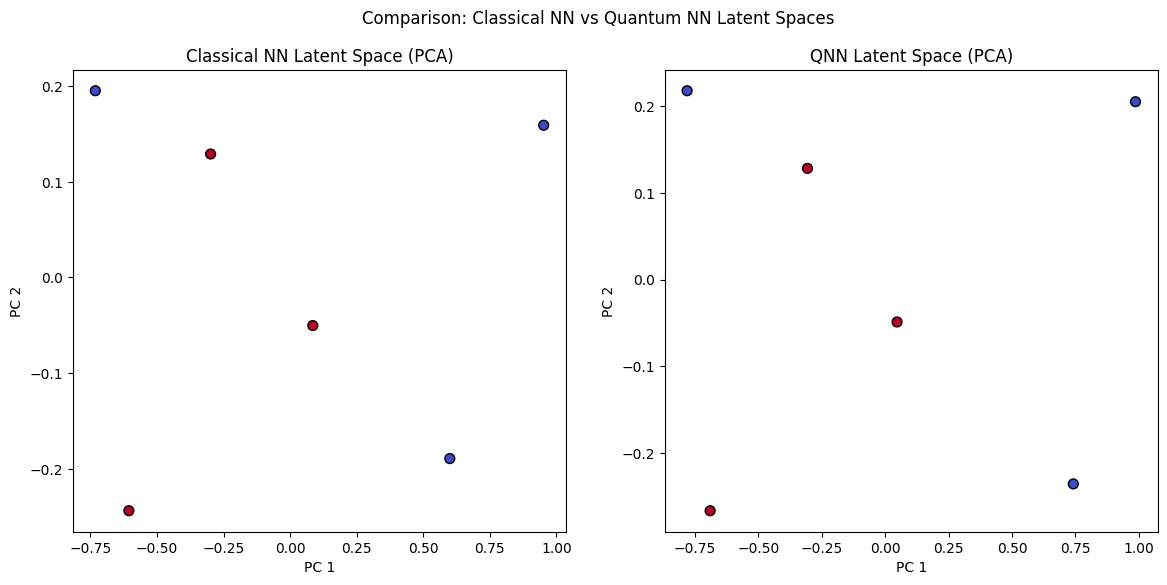

In [31]:
# --- Step 1: Define Classical Neural Network ---
class ClassicalClassifier(nn.Module):
    def __init__(self, input_dim=16, hidden_dim=32, output_dim=1):
        super(ClassicalClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, return_features=False):
        x1 = self.relu(self.fc1(x))
        x2 = self.fc2(x1)
        out = self.sigmoid(x2)
        if return_features:
            return x1  # return hidden layer activations
        else:
            return out

# --- Step 2: Train Classical Neural Network ---
model_classical = ClassicalClassifier()

criterion_cnn = nn.BCELoss()
optimizer_cnn = optim.Adam(model_classical.parameters(), lr=0.01)

# Train loop
for epoch in range(num_epochs):
    model_classical.train()
    optimizer_cnn.zero_grad()
    outputs = model_classical(X_train_tensor)
    loss = criterion_cnn(outputs, y_train_tensor)
    loss.backward()
    optimizer_cnn.step()

    if (epoch + 1) % 10 == 0:
        print(f'[Classical NN] Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print("[Classical NN] Training complete.")

# --- Step 3: Extract features from Classical NN ---
with torch.no_grad():
    feats_cnn = model_classical(X_test_tensor, return_features=True).numpy()

# --- Step 4: PCA for Classical NN ---
pca_cnn = PCA(n_components=2)
reduced_cnn = pca_cnn.fit_transform(feats_cnn)

# --- Step 5: Plot Comparison (QNN vs Classical NN) ---
# First extract QNN features (reuse code from before)
with torch.no_grad():
    feats_qnn = model(X_test_tensor, return_features=True).numpy()

pca_qnn = PCA(n_components=2)
reduced_qnn = pca_qnn.fit_transform(feats_qnn)

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(reduced_cnn[:, 0], reduced_cnn[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolor='k')
axes[0].set_title("Classical NN Latent Space (PCA)")
axes[0].set_xlabel("PC 1")
axes[0].set_ylabel("PC 2")

axes[1].scatter(reduced_qnn[:, 0], reduced_qnn[:, 1], c=y_test, cmap='coolwarm', s=50, edgecolor='k')
axes[1].set_title("QNN Latent Space (PCA)")
axes[1].set_xlabel("PC 1")
axes[1].set_ylabel("PC 2")

plt.suptitle("Comparison: Classical NN vs Quantum NN Latent Spaces")
plt.show()
